In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail/prod_cat_info.csv
/kaggle/input/retail/Customer.csv
/kaggle/input/retail/Transactions.csv


**Importing the data**

In [57]:
customer=pd.read_csv(r'/kaggle/input/retail/Customer.csv')
transaction=pd.read_csv(r'/kaggle/input/retail/Transactions.csv')
prod=pd.read_csv(r'/kaggle/input/retail/prod_cat_info.csv')


**Merging the data**

In [297]:
prod.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)
# merge transaction and prod_info table and create a new table "prod_concat"
prod_concat = pd.merge(left=transaction, right=prod,on=["prod_cat_code","prod_subcat_code"],how="left")

data = pd.merge(left=prod_concat, right=customer,right_on="customer_Id", left_on="cust_id", how="left")

data

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0


**Basic Analysis**

In [298]:
data.shape

(23053, 16)

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
 10  prod_cat          23053 non-null  object 
 11  prod_subcat       23053 non-null  object 
 12  customer_Id       23053 non-null  int64  
 13  DOB               23053 non-null  object 
 14  Gender            23044 non-null  object 
 15  city_code         23045 non-null  float64
dtypes: float64(3), int64(7), object(6)
memor

In [300]:
data.describe(include = "number")

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,271021.746497,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2431.692059,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,270980.000000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,273114.000000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


In [301]:
data.describe(include = "object")

,tran_date,Store_type,prod_cat,prod_subcat,DOB,Gender
count,23053,23053,23053,23053,23053,23044
unique,1129,4,6,18,3987,2
top,13-07-2011,e-Shop,Books,Women,27-12-1988,M
freq,35,9311,6069,3048,32,11811


**Missing Value Treatment**

In [302]:
data.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

The null values are negligable in amount so, it does'nt affect our analysis

**Duplicate values**

In [303]:
data.duplicated().sum()


13

In [304]:
data=data.drop_duplicates(keep='last')

In [305]:
data.duplicated().sum()

0

**Date time variable**

In [306]:
data[['DOB','tran_date']]=data[['DOB','tran_date']].apply(pd.to_datetime)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23040 non-null  int64         
 1   cust_id           23040 non-null  int64         
 2   tran_date         23040 non-null  datetime64[ns]
 3   prod_subcat_code  23040 non-null  int64         
 4   prod_cat_code     23040 non-null  int64         
 5   Qty               23040 non-null  int64         
 6   Rate              23040 non-null  int64         
 7   Tax               23040 non-null  float64       
 8   total_amt         23040 non-null  float64       
 9   Store_type        23040 non-null  object        
 10  prod_cat          23040 non-null  object        
 11  prod_subcat       23040 non-null  object        
 12  customer_Id       23040 non-null  int64         
 13  DOB               23040 non-null  datetime64[ns]
 14  Gender            2303

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


**Data Availabiltiy**

In [307]:
continous=data[["Qty","total_amt"]]
categorical=data.select_dtypes('object')

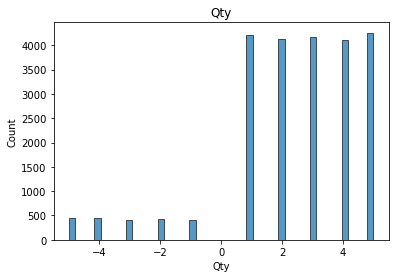

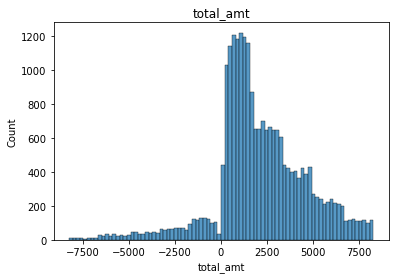

In [308]:
for i in continous.columns:
    sns.histplot(data[i])
    plt.title(i)
    plt.show()

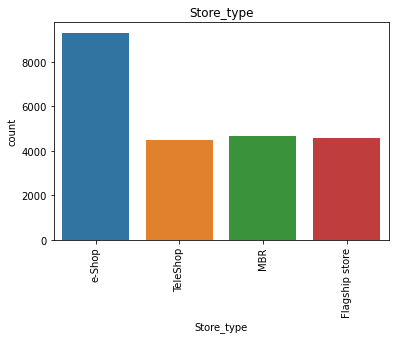

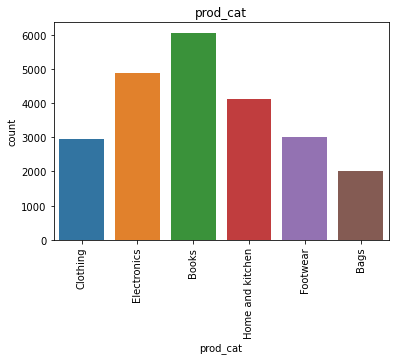

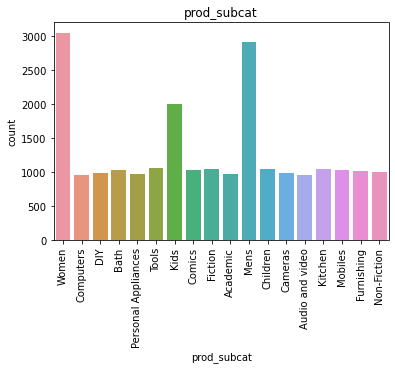

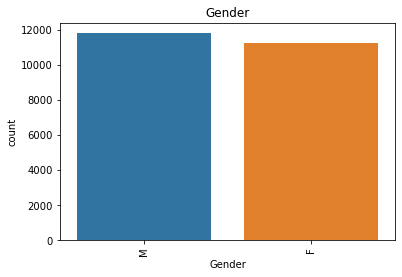

In [309]:
for i in categorical.columns:
    sns.countplot(x=data[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

 Time period of the available transaction data

In [310]:

a=data["tran_date"].max()
b=data["tran_date"].min()
print("start date",b,"end date",a)


start date 2011-01-02 00:00:00 end date 2014-12-02 00:00:00


# **Data Analysis**

Count of transactions where the total amount of transaction was negative


In [311]:
print("the transaction with return is",(data["total_amt"]<0).sum())


the transaction with return is 2164


 **Categories vs Gender**

In [312]:
data.pivot_table(index="Gender",columns="prod_cat",values="Qty",aggfunc="count")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,993,2946,1439,2328,1528,1993
M,1004,3116,1518,2567,1467,2132


In [313]:
data.pivot_table(index="Gender",columns="prod_cat",values="total_amt",aggfunc="sum")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2079618.84,6174590.825,3026750.805,5019354.21,3203155.215,4133702.235
M,2046722.99,6645972.775,3224079.495,5711351.62,3020200.365,4305169.505


**Category vs StoreType**

In [314]:
round(data.pivot_table(index = "prod_cat",columns="Store_type", values="Qty", aggfunc='sum'),2)


Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,970,983,910,1847
Books,2869,2929,2903,5978
Clothing,1394,1423,1456,2901
Electronics,2492,2422,2334,5070
Footwear,1413,1381,1453,3038
Home and kitchen,2004,2057,1937,3956


In [315]:
round(data.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.84,848678.68,789181.06,1617933.26
Books,2493677.81,2496039.19,2545714.47,5297161.16
Clothing,1194423.23,1287686.34,1241834.36,2527193.56
Electronics,2215136.04,2107969.83,1978457.20,4429142.77
Footwear,1234806.56,1112163.72,1235719.29,2643215.25
Home and kitchen,1713004.15,1822403.57,1581227.38,3327977.12


In [316]:
#store type sells the maximum products by value and by quantity

In [317]:
custfinal=data.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty",ascending=False)
custfinal

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Qty,Rate
Store_type,,
e-Shop,22790,5945770
MBR,11195,2953665
Flagship store,11142,2942874
TeleShop,10993,2836359


**City code which has the maximum customers and  the percentage of customers from that city**

In [318]:
customer_group = data.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)
customer_group

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: customer_Id, dtype: int64

In [319]:
percentage = round((customer_group[4.0] / customer_group.sum()) * 100,2)
print("city code=4 and percentage of customers",percentage)

city code=4 and percentage of customers 10.52


**Customers have more than 10 unique transactions, after removing all transactions
which have any negative amounts**

In [320]:
unique_trans = data[data.total_amt>0].reset_index(drop=True)
unique_trans.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0
1,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0
2,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,275023,1971-09-03,M,6.0
3,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,269345,1970-06-26,F,10.0
4,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,268799,1979-06-27,M,9.0


In [323]:
transaction_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()
ten=transaction_count[transaction_count.transaction_id>10]

In [324]:
x  = len(ten)
print(f'There are {x} customers who have more than ten unique transactions')

There are 6 customers who have more than ten unique transactions


**For all customers aged between 25 - 35, find out:**

**A. What was the total amount spent for “Electronics” and “Books” product categories?**

In [327]:
DOB = data.DOB
data['age'] = DOB.apply(lambda x: pd.to_datetime('today').year-x.year)
age = data[(data.age>=25) & (data.age<=35)].reset_index(drop=True)
age.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,age
0,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31
1,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31
2,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,34
3,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,268444,1992-02-01,F,6.0,31
4,31384765864,267058,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,Women,267058,1992-06-02,F,10.0,31


In [328]:
age_catg = age.groupby('prod_cat')['total_amt'].sum().reset_index()
age_catg[(age_catg.prod_cat=='Electronics') | (age_catg.prod_cat=='Books')]

,prod_cat,total_amt
1,Books,2667784.925
3,Electronics,2272602.670


**B.the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?**

In [332]:

date_limit = age[(age.tran_date > pd.to_datetime('01-01-2014', format='%d-%m-%Y')) & (age.tran_date<pd.to_datetime('01-03-2014', format='%d-%m-%Y'))].reset_index(drop=True)
date_limit.total_amt.sum()

340788.63